# Sprint 1: Data analysis and supervised learning

## Exploratory Data Analysis

Tijdens deze eerste sprint wordt enkel gefocust op het classificeren op basis van de verschillende product en issue categorieën. In de volgende sprints zullen ook de classificatie van sub-producten en sub-issues aan bod komen.

Inlezen van het CSV bestand naar een DataFrame.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

rows_to_read = 5000 # Gewenst aantal rijen inlezen (None = allemaal)

complaints = pd.read_csv('data/complaints.csv', delimiter=',', nrows=rows_to_read)

rows, cols = complaints.shape

print(f'Er zijn {rows} rijen en {cols} kolommen')

Er zijn 5000 rijen en 18 kolommen


In [2]:
# Uitvoer inverteren voor betere leesbaarheid
complaints.head().T

,0,1,2,3,4
Date received,07/23/19,07/26/19,06/03/19,07/03/19,07/14/19
Product,"Credit reporting, credit repair services, or o...",Debt collection,Debt collection,Debt collection,"Credit reporting, credit repair services, or o..."
Sub-product,Credit reporting,I do not know,I do not know,Other debt,Credit reporting
Issue,Credit monitoring or identity theft protection...,False statements or representation,Attempts to collect debt not owed,Attempts to collect debt not owed,Improper use of your report
Sub-issue,Problem canceling credit monitoring or identif...,Attempted to collect wrong amount,Debt was paid,Debt was result of identity theft,Received unsolicited financial product or insu...
Consumer complaint narrative,I have complained many times that the credit r...,please review the current fraud account and al...,Called multiple times over the years for a deb...,I sent in a letter to the company to have them...,On XX/XX/19 I applied for a Debt Relief Produc...
Company public response,Company has responded to the consumer and the ...,Company believes it acted appropriately as aut...,None,None,None
Company,Experian Information Solutions Inc.,"Ideal Collection Services, Inc.","ONEMAIN FINANCIAL HOLDINGS, LLC.","Diversified Consultants, Inc.","ClearOne Advantage, LLC"
State,CA,FL,FL,VA,PA
ZIP code,926XX,333XX,327XX,232XX,191XX


Om de data beter te begrijpen maken we een nieuwe DataFrame met slechts 3 kolommen.
- Product
- Sub-product
- Consumer complaint narrative

Met deze DataFrame gaan we het aantal klachten voor elke categorie van producten en sub-producten bepalen.

In [3]:
# Nieuwe DataFrame aanmaken met 3 kolommen
df = complaints[['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative']].copy()

# Kolommen een simpelere naam geven
df.columns = ['Product', 'Sub_Product', 'Issue', 'Sub_Issue', 'Narrative'] 

df.head()

,Product,Sub_Product,Issue,Sub_Issue,Narrative
0,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...
1,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...
2,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...
3,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...
4,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...


### Aantal klachten per categorie van producten

In [4]:
print('Aantal product categorieën:', pd.DataFrame(complaints.Product.unique()).size)

Aantal product categorieën: 10


Er zijn meer dan 18 verschillende categorieën voor de producten. Sommige zijn echter heel erg gerelateerd aan elkaar. Daarom kan het nuttig zijn om sommige categorieën samen te nemen om de accuraatheid van het te bekomen model te verbeteren.
- 'Credit reporting, repair, or other'
    - 'Credit reporting, credit repair services, or other personal consumer reports'
    - 'Credit reporting'
- 'Credit card or prepaid card'
    - 'Credit card'
    - 'Prepaid card'
- 'Payday loan, title loan, or personal loan
    - 'Payday loan'
- 'Money transfer, virtual currency, or money service'
    - 'Money transfer' 
    - 'Virtual currency'

In [5]:
df.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [6]:
pd.DataFrame(df.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Debt collection
2,"Payday loan, title loan, or personal loan"
3,Mortgage
4,Credit card or prepaid card
5,Checking or savings account
6,Student loan
7,Vehicle loan or lease
8,"Money transfer, virtual currency, or money ser..."


Er blijven nu slechts 13 product categorieën over.

Om het mogelijk te maken om een model te ontwikkelen gaan we elke categorie die in tekstvorm in de dataset staat, gaan voorstellen als een getal. Hiervoor voegen we een nieuwe kolom toe met als naam 'Category_Id'.

In [7]:
df['Category_Id'] = df['Product'].factorize()[0]

# Dictionary aanmaken die de 'Category_Id - Product' combinaties bevat
categories = dict(df[['Category_Id', 'Product']].drop_duplicates().values)
categories

{0: 'Credit reporting, repair, or other',
 1: 'Debt collection',
 2: 'Payday loan, title loan, or personal loan',
 3: 'Mortgage',
 4: 'Credit card or prepaid card',
 5: 'Checking or savings account',
 6: 'Student loan',
 7: 'Vehicle loan or lease',
 8: 'Money transfer, virtual currency, or money service'}

In [8]:
# Nieuwe DataFrame met de extra kolom weergeven
df.head().T

,0,1,2,3,4
Product,"Credit reporting, repair, or other",Debt collection,Debt collection,Debt collection,"Credit reporting, repair, or other"
Sub_Product,Credit reporting,I do not know,I do not know,Other debt,Credit reporting
Issue,Credit monitoring or identity theft protection...,False statements or representation,Attempts to collect debt not owed,Attempts to collect debt not owed,Improper use of your report
Sub_Issue,Problem canceling credit monitoring or identif...,Attempted to collect wrong amount,Debt was paid,Debt was result of identity theft,Received unsolicited financial product or insu...
Narrative,I have complained many times that the credit r...,please review the current fraud account and al...,Called multiple times over the years for a deb...,I sent in a letter to the company to have them...,On XX/XX/19 I applied for a Debt Relief Produc...
Category_Id,0,1,1,1,0


Vervolgens gaan we het aantal producten per categorie bepalen en visualiseren in een barplot.

In [9]:
# Aantal products
product_counts = pd.DataFrame({'Count': df.groupby(['Product']).size()})
product_counts

,Count
Product,
Checking or savings account,261
Credit card or prepaid card,447
"Credit reporting, repair, or other",2410
Debt collection,1026
"Money transfer, virtual currency, or money service",108
Mortgage,407
"Payday loan, title loan, or personal loan",78
Student loan,139
Vehicle loan or lease,124


<Figure size 720x360 with 0 Axes>

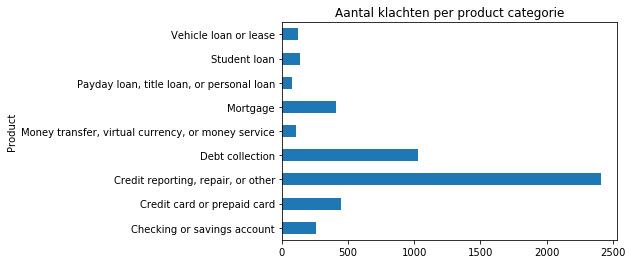

In [10]:
fig = plt.figure(figsize=(10, 5))
product_counts.plot.barh(title="Aantal klachten per product categorie", legend=None)

De verdeling van de data over de verschillende categorieën is niet gebalanceerd. Dit kan voor problemen zorgen bij het classificeren aangezien de kleine categorieën als uitschieters gezien kunnen worden. We zouden deze categorieën kunnen oversampelen zodat de dataset gebalanceerd wordt, maar aangezien de categorieën die het meest voorkomen ook het meest waarschijnlijk voorkomen tijdens het classificeren, zullen we dit niet doen.

Om deze categorieën van producten en sub-producten beter te begrijpen, gaan we het verband tussen beiden gaan onderzoeken.

In [11]:
sub_product_counts = pd.DataFrame({'Count': df.groupby(['Product', 'Sub_Product']).size()})
sub_product_counts.head(10)

Count
Product                     Sub_Product                                      
Checking or savings account CD (Certificate of Deposit)                     1
                            Checking account                              216
                            Other banking product or service               21
                            Savings account                                23
Credit card or prepaid card General-purpose credit card or charge card    353
                            General-purpose prepaid card                   21
                            Gift card                                       2
                            Government benefit card                         4
                            None                                            1
                            Payroll card                                    2

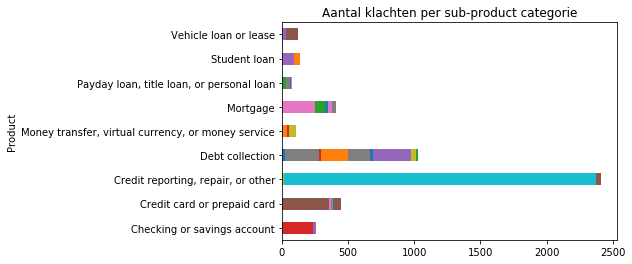

In [12]:
sub_product_counts.unstack().plot(kind='barh', stacked=True, legend=None, title="Aantal klachten per sub-product categorie")

## Data pre-processing

Om tekst als invoer te gebruiken voor algoritmes, moeten we deze gaan converteren naar bruikbare data. We berekenen hiervoor de Term Frequency en Inverse Document Frequency (TF-IDF).
- Term Frequency: beschrijft relatief hoeveel keer een gegeven woord in een document voorkomt ten opzichte van het totaal aantal woorden
- Inverse Document Frequency: beschrijft het aantal keer een bepaalde term voorkomt over meerdere documenten
    - Hoge IDF: term komt slechts voor in een paar documenten
    - Lage IDF: term komt in veel documenten voor

TfidfVectorizer class wordt geïnitialiseerd met de volgende paramters:
- `min_df`: verwijder de termen die in minder dan deze waarde aantal documenten voorkomt
- `sublinear_tf`: term frequentie op een logaritmische schaal plaatsen
- `stop_words`: verwijder specifieke (vaak voorkomende) stop woorden uit het Engels
- `ngram_range`: (1, 2) geeft aan dat zowel termen uit 1 woord (unigram), als termen die uit 2 woorden (bigram) bestaat kunnen gebruikt worden

Om dit te realiseren gaan we eerst elke klacht narrative omvormen naar een array van termen (= features).

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVector = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')

features = tfidfVector.fit_transform(df['Narrative']).toarray()
labels = df.Category_Id

print("De %d verschillende klachten worden voorgeteld door %d features" %(features.shape))

De 5000 verschillende klachten worden voorgeteld door 14656 features


Vervolgens gaan we voor elke categorie de meest voorkomende termen gaan selecteren aan de hand van de Chi-square verdeling.
- Unigrams: termen die slechts uit 1 woord bestaan
- Bigrams: termen die uit 2 woorden bestaan

De parameters voor de Chi-square verdeling zijn als volgt:
- X: features: (Category_Id, [features]) tuples
- y: labels (Category_Id)
- returns: (chi2_values, pvalues) tuples

Hiermee kunnen de Chi-square waarden berekend worden voor elke feature per categorie. Vervolgens kunnen we de features sorteren op de hoogste waarde om zo de features met hoogste frequentie te bepalen. Hier schrijven we telkens voor elke categorie de 3 meest voorkomende features uit.

In [14]:
from sklearn.feature_selection import chi2

N = 3
for Category_Id, Product in sorted(categories.items()):
    features_chi2 = chi2(features, labels == Category_Id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfVector.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    print("\n%s:" %(Product))
    print("\tUnigrams: %s" %(', '.join(unigrams[-N:])))
    print("\tBigrams: %s" %(', '.join(bigrams[-N:])))


Credit reporting, repair, or other:
	Unigrams: accounts, reporting, report
	Bigrams: xxxx xxxx, credit file, credit report

Debt collection:
	Unigrams: recovery, collection, debt
	Bigrams: portfolio recovery, collect debt, collection agency

Payday loan, title loan, or personal loan:
	Unigrams: ach, loan, payday
	Bigrams: 00 loan, pay loan, loan told

Mortgage:
	Unigrams: modification, escrow, mortgage
	Bigrams: mortgage payment, escrow account, loan modification

Credit card or prepaid card:
	Unigrams: amex, citi, card
	Bigrams: new card, american express, credit card

Checking or savings account:
	Unigrams: savings, deposit, branch
	Bigrams: debit card, savings account, checking account

Student loan:
	Unigrams: student, repayment, navient
	Bigrams: student loans, loan forgiveness, qualifying payments

Vehicle loan or lease:
	Unigrams: lease, vehicle, car
	Bigrams: consumer usa, santander consumer, paying car

Money transfer, virtual currency, or money service:
	Unigrams: coinbase, 

## Classification Experiments: Multi-Class Text Classification

Multi-Classification models die we zullen evalueren:
- Random Forest
- Linear Support Vector Machine
- Multinomial Naive Bayes
- Logistic Regression
- K-nearest neighbors

We evalueren de accuracy van de verschillende classificatie algoritmen aan de hand van cross-validatie:

De cross-validatie functie wordt voor elk model met de volgende parameters uitgevoerd:
- `estimator`: het object die gebruikt wordt om de data te fitten (het model)
- `X`: de features die gefit moeten worden
- `y`: de target die we proberen te voorspellen (supervised learning)
- `scoring`: het score object die gebruikt moet worden
- `cv`: splitting strategie instellen (default = 5) om de data in sequenties van train en test stukken op te delen

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [20]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
KNeighborsClassifier,0.6500,0.045205
LinearSVC,0.8178,0.009039
LogisticRegression,0.7912,0.006723
MultinomialNB,0.6318,0.009203
RandomForestClassifier,0.4836,0.001342


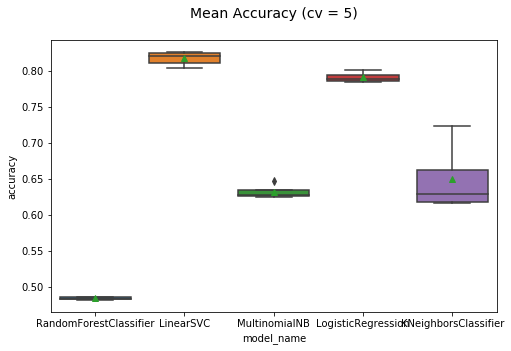

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', data=cv_df, showmeans=True)
plt.title("Mean Accuracy (cv = 5)\n", size=14);

Om een classificatie model te bekomen aan de hand van supervised learning, dienen we de originele dataset op te splitsen in train en test subsets. Op die manier kan het model getraind en getest worden op twee verschillende datasets. Zo kunnen we het algoritme gaan testen op een dataset die het algoritme nog niet gezien heeft.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(3750, 14656)
(3750,)
(1250, 14656)
(1250,)


Nu kunnen we de uitkomsten van classificatie gaan voorspellen op de test subset met het getrainde model.

In [23]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Vervolgens gaan we deze voorspellingen gaan vergelijken met onze target en hieruit een rapport genereren die evalueert hoe goed ons classificatie model werkt.

In [24]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names= df['Product'].unique()))

                                                    precision    recall  f1-score   support

                Credit reporting, repair, or other       0.89      0.90      0.90       611
                                   Debt collection       0.76      0.85      0.80       250
         Payday loan, title loan, or personal loan       0.00      0.00      0.00        17
                                          Mortgage       0.89      0.95      0.92        98
                       Credit card or prepaid card       0.76      0.75      0.76       118
                       Checking or savings account       0.75      0.88      0.81        59
                                      Student loan       0.77      0.73      0.75        33
                             Vehicle loan or lease       0.62      0.24      0.34        34
Money transfer, virtual currency, or money service       0.78      0.47      0.58        30

                                          accuracy                           0

Om te gaan visualiseren hoe goed het model de categorieën voorspeld heeft, gaan we een confusion matrix genereren. Indien alle categorieën correct zouden voorspelt zijn, zouden enkel de cellen die op de diagonaal liggen een waarde mogen hebben.

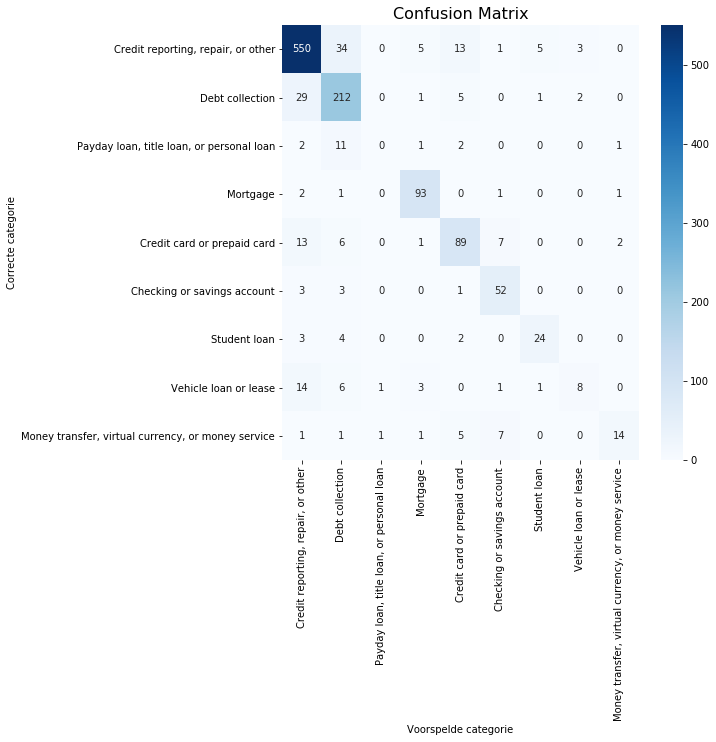

In [29]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', xticklabels=categories.values(), yticklabels=categories.values())
plt.ylabel('Correcte categorie')
plt.xlabel('Voorspelde categorie')
plt.title("Confusion Matrix", size=16);

De diagonaal is duidelijk zichtbaar waardoor we kunnen besluiten dat ons classificatie model naar behoren werkt.